# Lesson 2: Image Segmentation

* In this classroom, the libraries have been already installed for you.
* If you would like to run this code on your own machine, you need to install the following:
    ```
    !pip install ultralytics torch
    ```

In [1]:
# Import necessary libraries
# Setup paths and import local libraries
import sys
from pathlib import Path

if "has_changed_dir" not in globals():
    # Change directory only the first time
    %cd ..
    # Set the flag to indicate the change has been made
    has_changed_dir = True
    %ls ..
# has_changed_dir = False

prj_path = Path('Prompt-Engineering-for-Vision-Models')
sys.path.insert(0, str(prj_path))

from PIL import Image
from utils import resize_image
import torch
from ultralytics import YOLO
# To visualize, import matplotlib
from matplotlib import pyplot as plt

from utils import show_points_on_image
from utils import show_masks_on_image
from utils import format_results, point_prompt
from utils import box_prompt
from utils import show_boxes_on_image
from utils import get_model

/home/sdjkhosh/Projects/Prompt-Engineering-for-Vision-Models


/home/sdjkhosh/miniconda3/envs/prompt/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Prompt-Engineering-for-Vision-Models/  Stream-Assesment/  TerrAInav-Sim/


In [2]:
# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Load the sample image

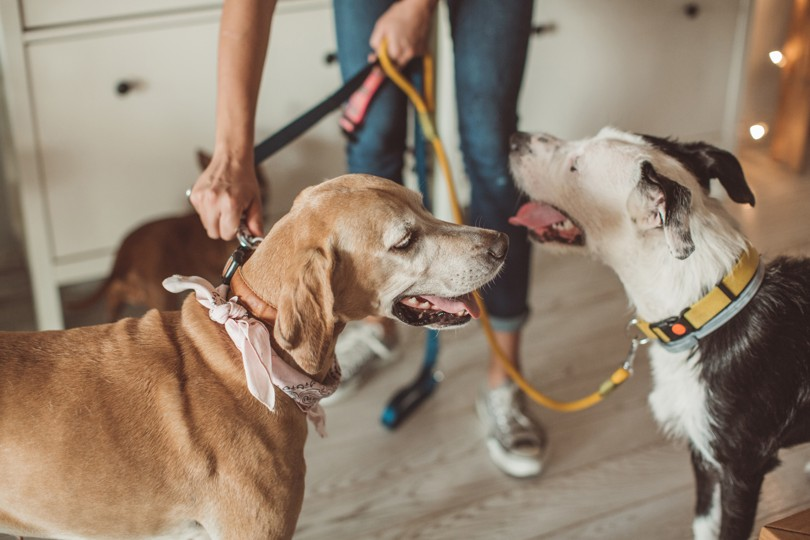

In [3]:
raw_image = Image.open("images/two_dogs.jpg")
raw_image

>Note: the images referenced in this notebook have already been uploaded to the Jupyter directory, in this classroom, for your convenience. For further details, please refer to the **Appendix** section located at the end of the lessons.

* Resize the image.

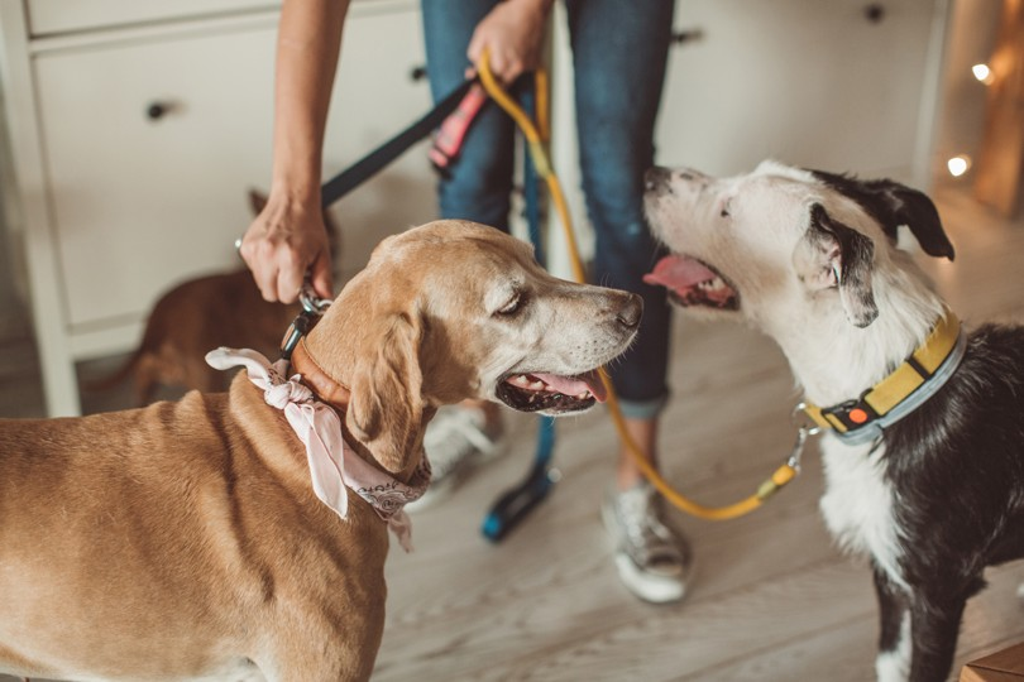

In [4]:
resized_image = resize_image(raw_image, input_size=1024)
resized_image

### Import and prepare the model

Info about [torch](https://pytorch.org/).

Info about ['FastSAM'](https://docs.ultralytics.com/models/fast-sam/)

### Use the model

>Note: ```utils``` is an additional file containing the methods that have been already developed for you to be used in this classroom. 
For further details, please refer to the **Appendix** section located at the end of the lessons.

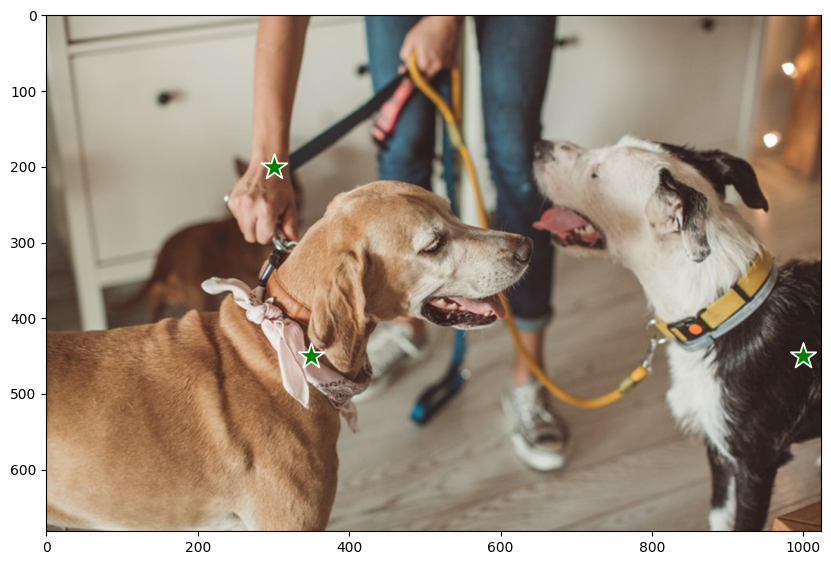

In [5]:
# Define the coordinates for the point in the image
# [x_axis, y_axis]

class1_points = [350, 450]
class2_points = [1000, 450]
exclude_points = [300, 200]


all_points = [ class1_points, class2_points, exclude_points ] # positive point
# Specify the label for the point
# 1 for positive point, 0 for negative point
all_labels = [1, 1, 0] # positive point

# Function written in the utils file
show_points_on_image(resized_image, all_points)

In [6]:
input_points = [class1_points]
input_labels = [1]  # positive prompt

model = YOLO(get_model('FastSAM-s'))


* Filter the mask based on the point defined before.

* Define 'semantic masks' - two points to be masked.


0: 448x640 41 objects, 39.1ms
Speed: 11.5ms preprocess, 39.1ms inference, 527.8ms postprocess per image at shape (1, 3, 448, 640)


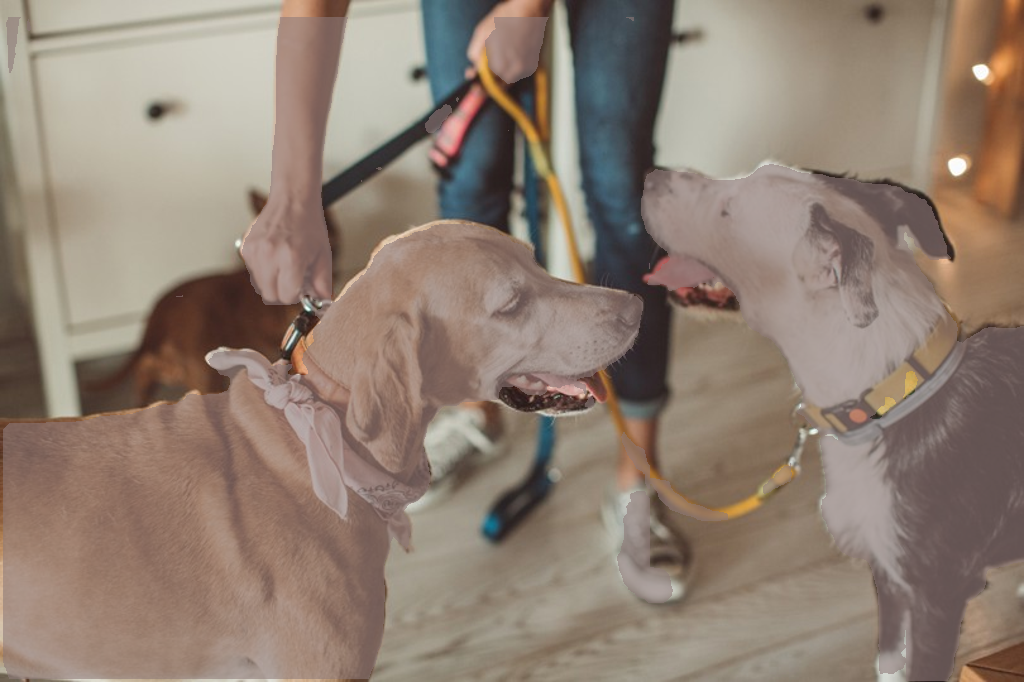

In [7]:
input_points = [class1_points, class2_points]
input_labels = [1, 1]  # positive prompt

# Run the model
results = model(resized_image, device=device, retina_masks=True)
results = format_results(results[0], 0)
# Generate the masks
masks, _ = point_prompt(results, input_points, input_labels)
# Visualize the generated masks
show_masks_on_image(resized_image, [masks])

* Identify subsections of the image by adding a **negative prompt**.

>Note: From the image above, the red star indicates the negative prompt and the green star the positive prompt.

>Note: Please note that the results obtained from running this notebook may vary slightly from those demonstrated by the instructor in the video. 


0: 448x640 41 objects, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


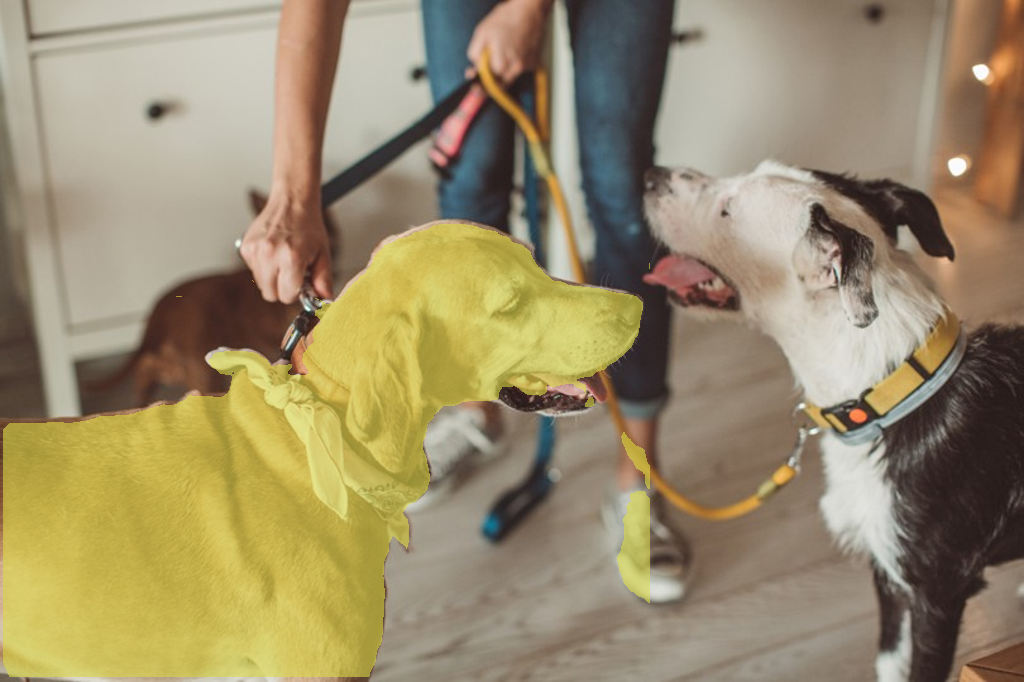

In [8]:
# Define the coordinates for the points to be masked
# [x_axis, y_axis]
input_points = [ class1_points, exclude_points ]
input_labels = [1, 0] # positive prompt, negative prompt

# Run the model
results = model(resized_image, device=device, retina_masks=True)
results = format_results(results[0], 0)
# Generate the masks
masks, _ = point_prompt(results, input_points, input_labels)
# Visualize the generated masks
show_masks_on_image(resized_image, [masks])


### Prompting with bounding boxes

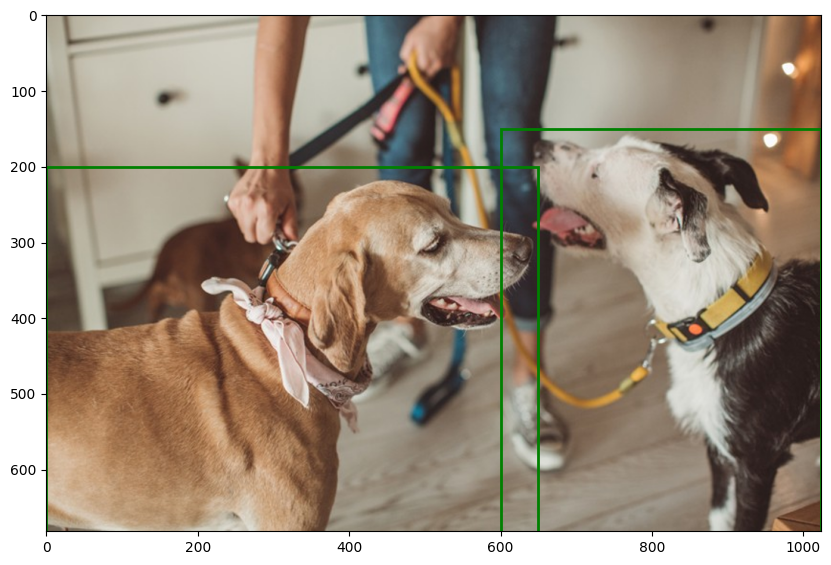

In [9]:
# Set the coordinates for the box
# [xmin, ymin, xmax, ymax]
class1_boxes = [0, 200, 650, 700]
class2_boxes = [600, 700, 1024, 150]
input_boxes = [class1_boxes, class2_boxes]
# Visualize the bounding box defined with the coordinates above
show_boxes_on_image(resized_image, input_boxes)

* Now, try to isolate the mask from the total output of the model.

In [10]:
results = model(resized_image, device=device, retina_masks=True)
#Generate the masks
numeric_masks = results[0].masks.data
numeric_masks


0: 448x640 41 objects, 6.6ms
Speed: 2.2ms preprocess, 6.6ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [11]:
# Convert to True/False booleans
bool_masks = numeric_masks > 0
bool_masks

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [

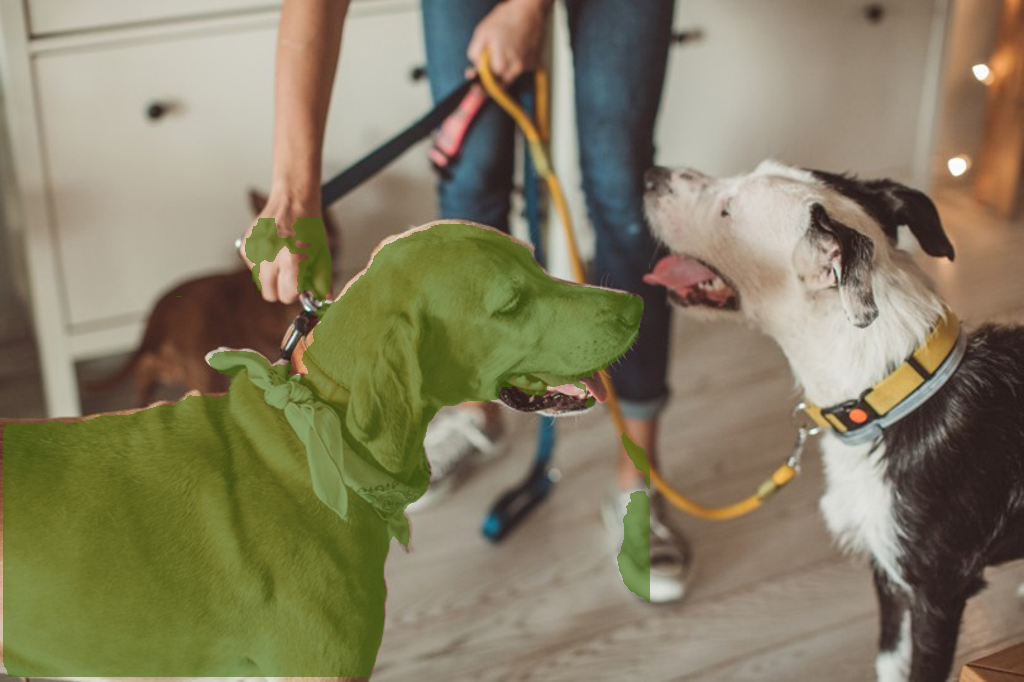

In [12]:
masks, _ = box_prompt(bool_masks, input_boxes[0])
# Visualize the masks
show_masks_on_image(resized_image, [masks])


In [13]:
masks

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

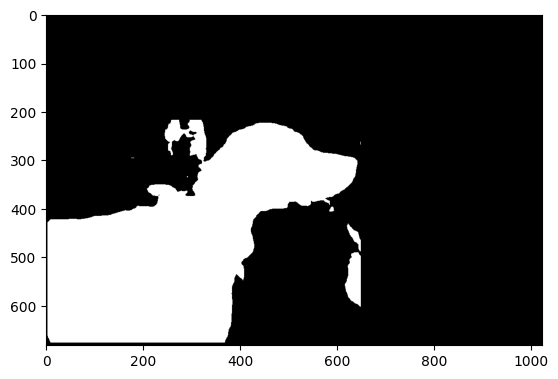

In [14]:
# Plot the binary mask as an image
plt.imshow(masks, cmap='gray')

### Additional Resources

* For more on how to use Comet for experiment tracking, check out this [Quickstart Guide](https://colab.research.google.com/drive/1jj9BgsFApkqnpPMLCHSDH-5MoL_bjvYq?usp=sharing) and the [Comet Docs](https://www.comet.com/docs/v2/).
* This course was based off a set of two blog articles from Comet. Explore them here for more on how to use newer versions of Stable Diffusion in this pipeline, additional tricks to improve your inpainting results, and a breakdown of the pipeline architecture:
  * [SAM + Stable Diffusion for Text-to-Image Inpainting](https://www.comet.com/site/blog/sam-stable-diffusion-for-text-to-image-inpainting/)
  * [Image Inpainting for SDXL 1.0 Base Model + Refiner](https://www.comet.com/site/blog/image-inpainting-for-sdxl-1-0-base-refiner/)
